In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action= 'ignore')

C:\Users\unique\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
#checking for null values

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#description of dataset
train.describe(include= 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [8]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

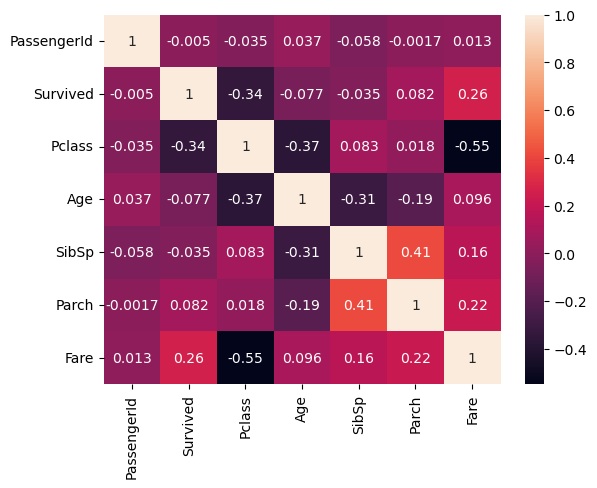

In [9]:
sns.heatmap(train.corr(), annot= True)

In [10]:
male_c= len(train[train['Sex']== 'male'])
print('Number of Males in Titanic:', male_c)

Number of Males in Titanic: 577


In [11]:
female_c =  len(train[train['Sex']== 'female'])
print('Number of female in Titanic:', female_c)

Number of female in Titanic: 314


<function matplotlib.pyplot.show(close=None, block=None)>

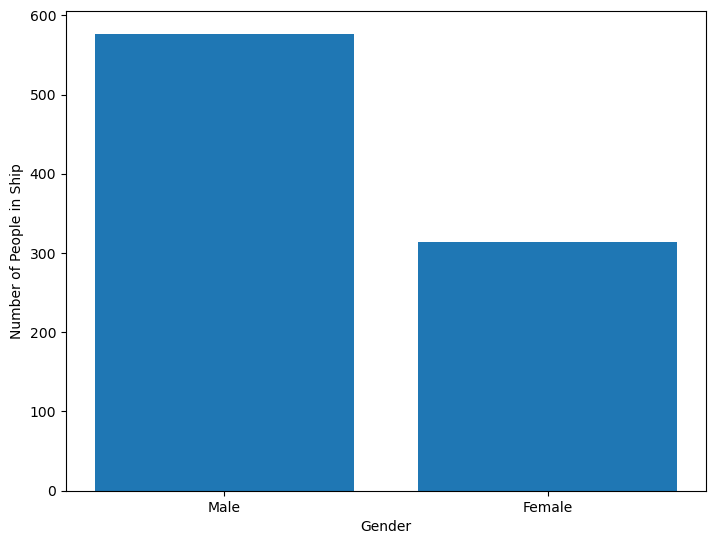

In [12]:
#Plotting the count
fig= plt.figure()
ax= fig.add_axes([0,0,1,1])
gender= ['Male', 'Female']
index= [male_c, female_c]
ax.bar(gender, index)
plt.xlabel('Gender')
plt.ylabel('Number of People in Ship')
plt.show

In [13]:
alive= len(train[train['Survived']== 1])
dead= len(train[train['Survived']== 0])

<function matplotlib.pyplot.show(close=None, block=None)>

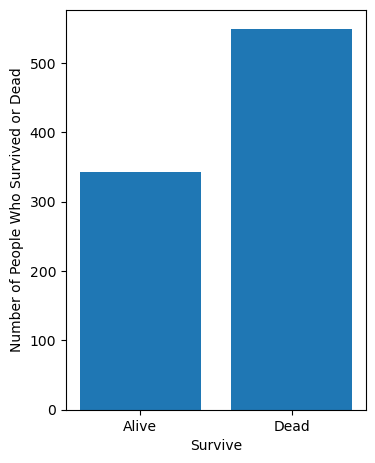

In [14]:
fig= plt.figure(figsize= (3,4))
ax= fig.add_axes([0,0,1,1])
Survive= ['Alive', 'Dead']
index= [alive, dead]
ax.bar(Survive, index)
plt.xlabel('Survive')
plt.ylabel('Number of People Who Survived or Dead')
plt.show

In [15]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


Text(0.5, 1.0, 'Bar graph of people accoring to ticket class who did not Survived')

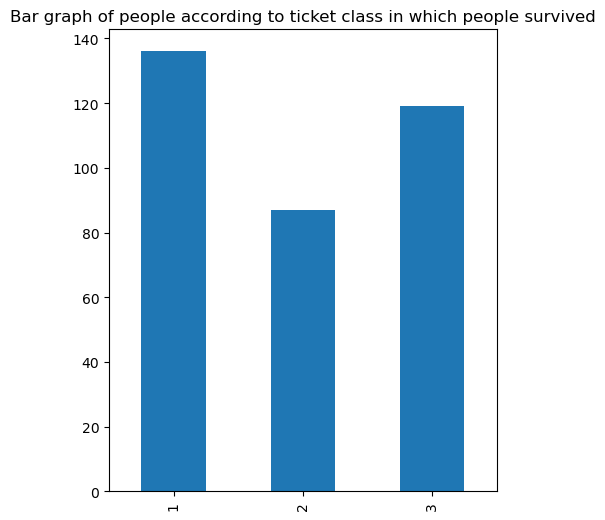

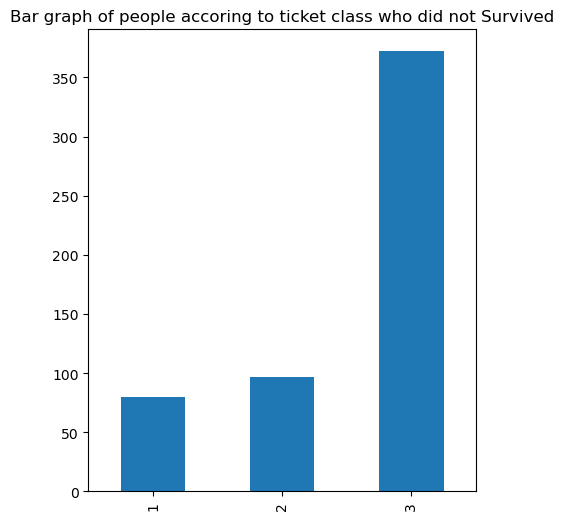

In [16]:
plt.figure(figsize=(5,6))
train.loc[train['Survived']==1 , 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people according to ticket class in which people survived')

plt.figure(figsize= (5,6))

train.loc[train['Survived']==0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accoring to ticket class who did not Survived')

([<matplotlib.axis.XTick at 0x1e31a7eb250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

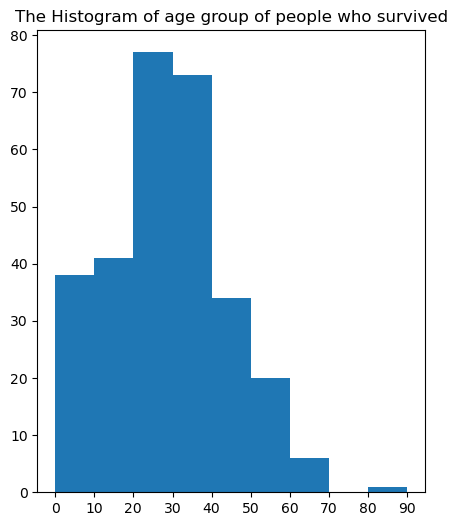

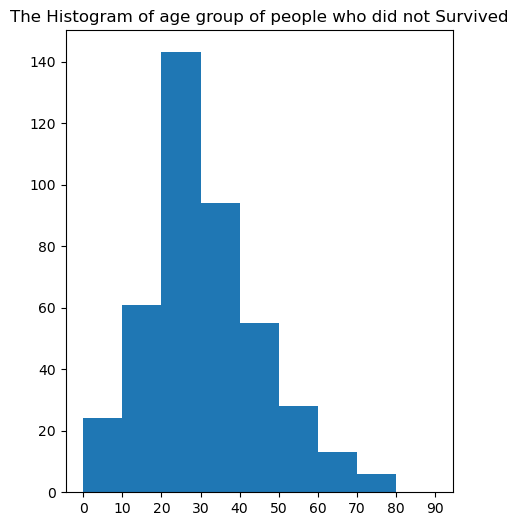

In [17]:
plt.figure(figsize= (5,6))
age=  train.loc[train['Survived']== 1, 'Age']
plt.title('The Histogram of age group of people who survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

plt.figure(figsize= (5,6))
age=  train.loc[train['Survived']==0, 'Age']
plt.title('The Histogram of age group of people who did not Survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [18]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index= False).mean().sort_values(by= 'Survived', ascending= False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index= False).mean().sort_values(by= 'Survived', ascending= False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
train[['Age', 'Survived']].groupby(['Age'], as_index= False).mean().sort_values(by= 'Survived', ascending= False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [21]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index= False).mean().sort_values(by= 'Survived', ascending= False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


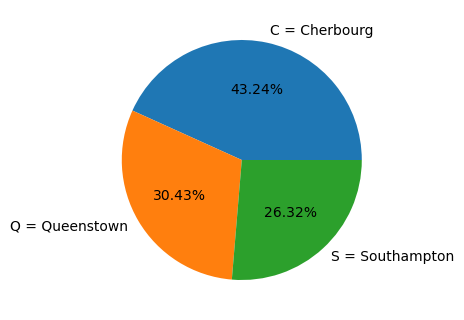

In [22]:
fig= plt.figure(figsize=  (3,3))
ax= fig.add_axes([0,0,1,1])
ax.axis('equal')
l= ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s= [0.553571, 0.389610,0.336957 ]
ax.pie(s, labels= l, autopct= '%1.2f%%')
plt.show()

In [23]:
test.describe(include= 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


Dropping Useless coloumn from Train and Test Data.

In [24]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [25]:
train= train.drop(['Cabin'], axis =1)
test= test.drop(["Cabin"], axis= 1)

#Feature selection.

In [26]:
column_train= ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']
X= train[column_train]  #Training Values
Y= train['Survived']     #Test Values

In [27]:
for key, value in X.items():
    null_values = value.isnull().sum()
    print(f"Key: {key}, Null Values: {null_values}")

Key: Pclass, Null Values: 0
Key: Age, Null Values: 177
Key: SibSp, Null Values: 0
Key: Parch, Null Values: 0
Key: Fare, Null Values: 0
Key: Sex, Null Values: 0
Key: Embarked, Null Values: 2


Now We Will Fill the Missing values in Age And Embarked columns.

In [28]:
#Filling median in Age column
X['Age']= X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [29]:
X['Embarked']= X['Embarked'].fillna(method= 'pad')
X['Embarked'].isnull().sum()

0

In [30]:
#Converting Sex column into True and False numeric values

X['Sex']= X['Sex'].map({'male':0, 'female': 1})
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [31]:
#Converting Embarked Columns to Numeric category

X['Embarked']= X['Embarked'].map({'C':0, 'Q':1, 'S': 2})
X['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

Splitting The Model into Train and Test

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test =train_test_split(X,Y, test_size= 0.3, random_state= 7)

In [33]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(X_train, Y_train)
Y_pred= LR.predict(X_test)
from sklearn.metrics import accuracy_score
ACC1= accuracy_score(Y_test, Y_pred)
print('Accuracy score', ACC1)

Accuracy score 0.7574626865671642


In [34]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat= confusion_matrix(Y_test, Y_pred)
print(conf_mat)

[[130  26]
 [ 39  73]]


In [35]:
#Using Support Vector Machine
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train, Y_train)
Y_pred= svm.predict(X_test)
ACC2= accuracy_score(Y_test, Y_pred)
print('Accuracy Score', ACC2)

Accuracy Score 0.6604477611940298


In [36]:
from sklearn.metrics import classification_report
conf_mat= confusion_matrix(Y_test, Y_pred)
class_report= classification_report(Y_test, Y_pred)

print(conf_mat)
print(class_report)

[[149   7]
 [ 84  28]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       156
           1       0.80      0.25      0.38       112

    accuracy                           0.66       268
   macro avg       0.72      0.60      0.57       268
weighted avg       0.71      0.66      0.61       268



In [55]:
def model_details(model, algo):
    Y_pred= model.predict(X_test)
    accu= accuracy_score(Y_test, Y_pred)
    confu_mat= confusion_matrix(Y_test, Y_pred)
    class_report= classification_report(Y_test, Y_pred)
    print('Accuracy Score :' ,accu)
    print('Confusion Matrix : ', confu_mat)
    print('Classification Report :', class_report)

In [56]:
model_details(LR, 'LogisticRegression')

Accuracy Score : 0.7574626865671642
Confusion Matrix :  [[130  26]
 [ 39  73]]
Classification Report :               precision    recall  f1-score   support

           0       0.77      0.83      0.80       156
           1       0.74      0.65      0.69       112

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.75       268
weighted avg       0.76      0.76      0.75       268



In [61]:
#Using KNN Method
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 5)
KNN.fit(X_train, Y_train)
Y_pred= KNN.predict(X_test)

model_details(KNN, 'KNeighborsClassifiers')

Accuracy Score : 0.6604477611940298
Confusion Matrix :  [[127  29]
 [ 62  50]]
Classification Report :               precision    recall  f1-score   support

           0       0.67      0.81      0.74       156
           1       0.63      0.45      0.52       112

    accuracy                           0.66       268
   macro avg       0.65      0.63      0.63       268
weighted avg       0.66      0.66      0.65       268



In [62]:
#Using Gausian NB method

from sklearn.naive_bayes import GaussianNB
NB= GaussianNB()
NB.fit(X_train, Y_train)
Y_pred= NB.predict(X_test)

model_details(NB, 'GaussianNB')

Accuracy Score : 0.7686567164179104
Confusion Matrix :  [[129  27]
 [ 35  77]]
Classification Report :               precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [64]:
#Using Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier(criterion = 'entropy', random_state= 7)
DT.fit(X_train, Y_train)
Y_pred= DT.predict(X_test)

model_details(DT, 'DecisionTreeClassifier')

Accuracy Score : 0.7425373134328358
Confusion Matrix :  [[132  24]
 [ 45  67]]
Classification Report :               precision    recall  f1-score   support

           0       0.75      0.85      0.79       156
           1       0.74      0.60      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268



In [66]:
results=  pd.DataFrame({'Model':['Logistic Regression', 'Support Vector Machine', 'Naive Bayes', 'KNN', 'Decission Tree'],
                       'Score': [0.7574626865671642, 0.6604477611940298, 0.7686567164179104, 0.6604477611940298, 0.7425373134328358]})
result_df= results.sort_values(by= 'Score', ascending= True)
result_df= result_df.set_index('Score')
result_df.head()

,Model
Score,
0.660448,Support Vector Machine
0.660448,KNN
0.742537,Decission Tree
0.757463,Logistic Regression
0.768657,Naive Bayes


After observing all the method. I saw that Naive Bayes model has highest accuracy, so I will use this model for future prediction and analysis.